# PROJET 


## Data Analysis and Text Mining 






In [1]:
#Bibliothéques utilisées 

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from matplotlib import pyplot as plt
from sklearn import datasets

import numpy as np

# 1. Text Processing and Transformation

In [ ]:
#specifications de 4 categories
categories =  ['alt.atheism', 'soc.religion.christian',
                  'comp.graphics', 'sci.med']

#Importer les données 
#definir le train et le test 
twenty_train = fetch_20newsgroups(subset='train',
        categories=categories, shuffle=True, random_state=42)

test = fetch_20newsgroups(subset='test', categories=categories,shuffle=True,random_state=42)

###  Tokenisation de texte
Étant donné que l'ensemble de données est une série de mots, avant d'exécuter des algorithmes d'apprentissage automatique, nous devons convertir les représentations de texte en représentations numériques

In [31]:
doc_test=test.data

#initialiser count_vector pour calculer le nombre de mot
vector_count = CountVectorizer()
X_train_counts = vector_count.fit_transform(twenty_train.data)

# transformer les données en vecteurs 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

 
# afficher les valeurs de idf 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=vector_count.get_feature_names(),columns=["idf_weights"])

X_train_tfidf.shape




test_counts = vector_count.transform(doc_test)

test_tfidf=tfidf_transformer.transform(test_counts)


clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)
        
predicted=clf.predict(test_tfidf)


In [32]:
# Afficher les vocabulaires avec leur poids 
df_idf.sort_values(by=['idf_weights'])


,idf_weights
from,1.000000
subject,1.000000
lines,1.003994
the,1.055545
organization,1.057419
to,1.084037
of,1.086448
in,1.127854
and,1.134418
is,1.188541


# 2 : visualiation


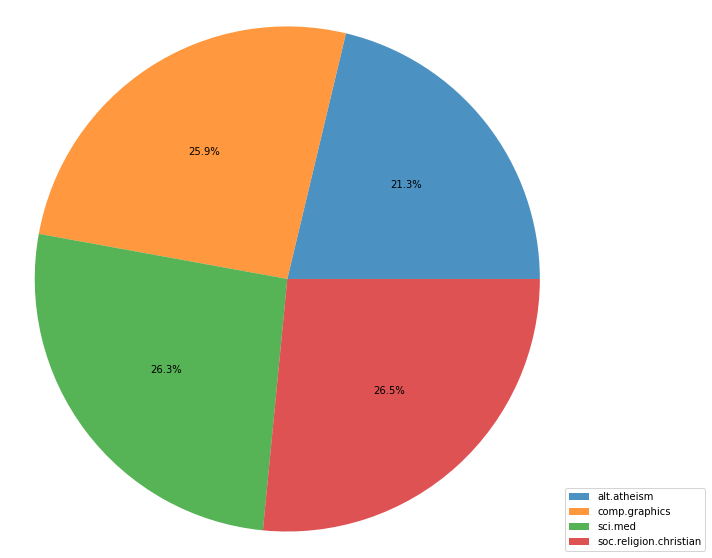

In [33]:
# visualisation de catégorie des articles 
figure = plt.figure(figsize=(10, 10))

targets, sizes = np.unique(twenty_train.target, return_counts=True)
target_names = [twenty_train.target_names[i] for i in targets]

patches, _, _ = plt.pie(sizes, autopct='%1.1f%%', wedgeprops={'alpha': 0.8})

plt.legend(patches, target_names, loc=(1, 0.0))

plt.axis('equal')
plt.show()

In [34]:
# conversion en dataframe pour une analyse exploratoire plus facile

data=pd.DataFrame(twenty_train['data'])
target = pd.DataFrame(twenty_train['target'])
data.columns=['data']
data['target']=target
twenty_train = data

In [35]:
twenty_train[0:10]

,data,target
0,From: sd345@city.ac.uk (Michael Collier)\nSubj...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson)\nSu...,3
3,From: s0612596@let.rug.nl (M.M. Zwart)\nSubjec...,3
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2
8,From: geb@cs.pitt.edu (Gordon Banks)\nSubject:...,2
9,From: libman@hsc.usc.edu (Marlena Libman)\nSub...,2


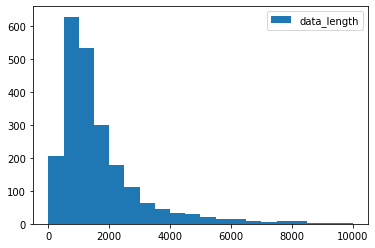

In [36]:
length_data = twenty_train['data'].str.len() # taille de données 
#length_test = test['data'].str.len() # taille de données 

plt.hist(length_data, bins=20, label="data_length",range=[0,10000])
#plt.hist(length_test,  bins=20, label="test_tweets")
plt.legend() #la légénde 
plt.show()

# visualisation via NMF (Catégorie ) 


In [37]:
# On visualise les distributions des 4 catégories via NMF

In [38]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

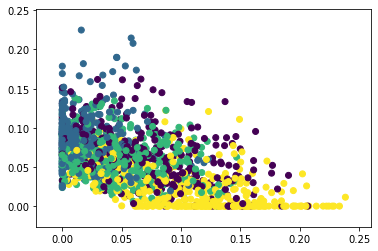

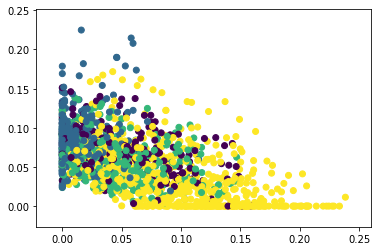

In [39]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2)
NF = nmf.fit_transform(test_tfidf)
plt.figure()
plt.scatter(NF[:,0],NF[:,1],c=test.target)
plt.figure()
plt.scatter(NF[:,0],NF[:,1],c=predicted)

# Matrice de correlation 

In [40]:
from sklearn import metrics
import seaborn as sns
import pandas 
from io import StringIO



df = metrics.classification_report(test.target, predicted,
     target_names=test.target_names)

accuracy = metrics.accuracy_score(test.target, predicted)

print(df)

print('accuracy ' ,accuracy)


                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502

accuracy  0.8348868175765646


AttributeError: 'DataFrame' object has no attribute 'target_names'

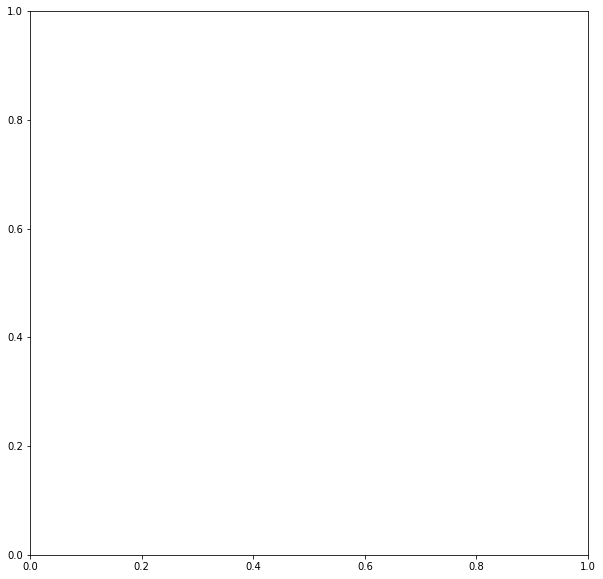

In [46]:
# Plot de la matrice de confusion 
cm = metrics.confusion_matrix(test.target, predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=twenty_train.target_names, yticklabels=twenty_train.target)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
plt.show()



# afficher les tailles de train et test 

In [10]:
def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 10 ** 6

train_dataset_size_mb = size_mb(twenty_train.data)
test_dataset_size_mb = size_mb(test.data) 

print(f'{len(twenty_train.data):5d} documents,  {train_dataset_size_mb:7.3f} MB (train)')
print(f'{len(test.data):5d} documents,  {test_dataset_size_mb:7.3f} MB (test)')


 2257 documents,    4.498 MB (train)
 1502 documents,    3.342 MB (test)


# type de données : un tableau ndarray

In [11]:
type(X_train_tfidf.data)

numpy.ndarray

# 3 - Machine learning  

# SVM

In [12]:
#importer les bibliotheque pour faire de l'apprentissage
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier


In [13]:
#SVM Implementation

text_clf=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',SGDClassifier(loss='hinge',alpha=1e-3,random_state=42))])
text_clf.fit(twenty_train.data,twenty_train.target)

predicted=text_clf.predict(doc_test)

#afficher l'accuracy
print("SVM Accuracy:")
print(np.mean(predicted==test.target))

SVM Accuracy:
0.9114513981358189


# Naive bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = vector_count.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
       print('%r => %s' % (doc, twenty_train.target[category]))
        


'God is love' => 3
'OpenGL on the GPU is fast' => 1


In [44]:
accuracy_score(test.target, predicted)

0.8348868175765646

In [45]:
print('report classification:\n',classification_report(predicted, test.target),'\n')
print('Matrice de confusion:\n',confusion_matrix(predicted,test.target))


report classification:
               precision    recall  f1-score   support

           0       0.60      0.97      0.74       198
           1       0.89      0.96      0.92       362
           2       0.81      0.97      0.88       333
           3       0.99      0.65      0.78       609

    accuracy                           0.83      1502
   macro avg       0.82      0.89      0.83      1502
weighted avg       0.87      0.83      0.83      1502
 

Matrice de confusion:
 [[192   2   2   2]
 [  2 347  11   2]
 [  6   4 322   1]
 [119  36  61 393]]


# k plus proche voisin (kNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier 


model = KNeighborsClassifier().fit(X_train_tfidf, twenty_train.target)
predicted = model.predict(test_tfidf)
accuracy_score(test.target,predicted)

0.7656458055925432

In [19]:
print('report classification:\n',classification_report(predicted, test.target),'\n')
print('Matrice de confusion:\n',confusion_matrix(predicted,test.target))


report classification:
               precision    recall  f1-score   support

           0       0.87      0.58      0.70       477
           1       0.79      0.91      0.85       338
           2       0.58      0.89      0.70       260
           3       0.84      0.78      0.81       427

    accuracy                           0.77      1502
   macro avg       0.77      0.79      0.76      1502
weighted avg       0.79      0.77      0.76      1502
 

Matrice de confusion:
 [[277  53  93  54]
 [  3 309  24   2]
 [  9  11 231   9]
 [ 30  16  48 333]]


# logistic regression

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), 
        ('clf', LogisticRegression())]) 

text_clf.fit(twenty_train.data, twenty_train.target)
print(text_clf.score(test.data, test.target))


0.9067909454061251


In [21]:
twenty_train.target

0       1
1       1
2       3
3       3
4       3
5       3
6       3
7       2
8       2
9       2
10      3
11      1
12      0
13      0
14      1
15      1
16      2
17      0
18      3
19      0
20      3
21      0
22      3
23      1
24      1
25      1
26      3
27      3
28      2
29      2
       ..
2227    0
2228    0
2229    3
2230    3
2231    0
2232    1
2233    0
2234    0
2235    2
2236    1
2237    0
2238    2
2239    2
2240    2
2241    1
2242    1
2243    2
2244    2
2245    2
2246    3
2247    3
2248    1
2249    3
2250    0
2251    2
2252    2
2253    2
2254    2
2255    2
2256    2
Name: target, Length: 2257, dtype: int64

# Decision tree

In [22]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
Mtree = tree.DecisionTreeClassifier()
Mtree.fit(X_train_tfidf, twenty_train.target)
predicted = Mtree.predict(test_tfidf)

In [23]:
print('Accuracy: ',accuracy_score(predicted,test.target),'\n')
errortree=np.mean(predicted != test.target)
print('Erreur : ', errortree,'\n')

Accuracy:  0.7197070572569907 

Erreur :  0.2802929427430093 



In [24]:
print('report classification:\n',classification_report(predicted, test.target),'\n')
print('Matrice de confusion:\n',confusion_matrix(predicted,test.target))

report classification:
               precision    recall  f1-score   support

           0       0.65      0.66      0.65       314
           1       0.81      0.71      0.76       448
           2       0.59      0.69      0.64       339
           3       0.81      0.81      0.81       401

    accuracy                           0.72      1502
   macro avg       0.72      0.72      0.71      1502
weighted avg       0.73      0.72      0.72      1502
 

Matrice de confusion:
 [[206  21  55  32]
 [ 27 317  83  21]
 [ 38  46 234  21]
 [ 48   5  24 324]]


# Random forest 

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_features=24)
rfc.fit(X_train_tfidf, twenty_train.target)
ypredrfc = rfc.predict(test_tfidf)

In [26]:
print('Accuracy: ',accuracy_score(ypredrfc,test.target),'\n')
errorrfc=np.mean(ypredrfc != test.target)
print('Erreur : ', errorrfc,'\n')

Accuracy:  0.788948069241012 

Erreur :  0.211051930758988 



In [27]:
print('report classification:\n',classification_report(ypredrfc, test.target),'\n')
print('Matrice de confusion:\n',confusion_matrix(ypredrfc,test.target))

report classification:
               precision    recall  f1-score   support

           0       0.61      0.93      0.74       208
           1       0.98      0.68      0.80       557
           2       0.62      0.92      0.74       267
           3       0.92      0.78      0.84       470

    accuracy                           0.79      1502
   macro avg       0.78      0.83      0.78      1502
weighted avg       0.84      0.79      0.79      1502
 

Matrice de confusion:
 [[194   3   7   4]
 [ 25 380 128  24]
 [ 14   2 246   5]
 [ 86   4  15 365]]


# Conclusion 

In [ ]:
On remarque que l'algorithme SVM a le plus petit taux d'erreur par apport aux autres 